In [268]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

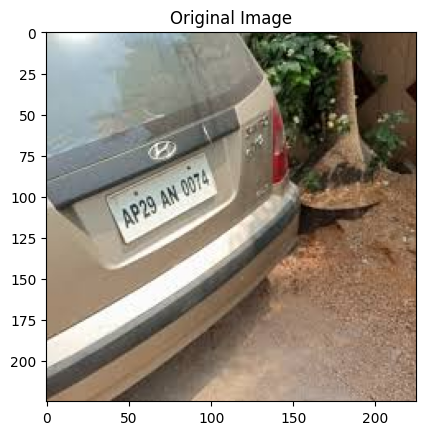

Text(0.5, 1.0, 'Processed Image')

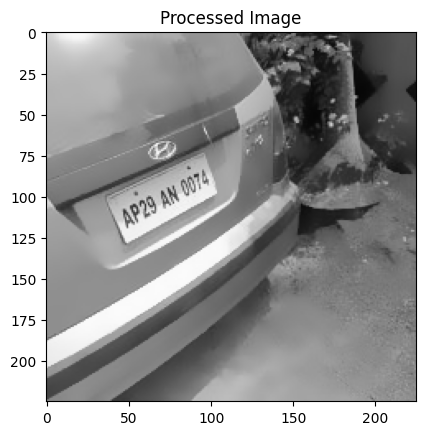

In [269]:
img = cv2.imread("Test3.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')


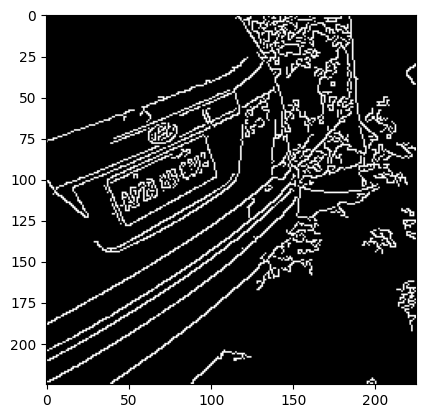

In [270]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [271]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [272]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)


Location:  [[[ 98  74]]

 [[ 37 100]]

 [[ 51 128]]

 [[103  99]]]


In [273]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)


Location:  [[[ 98  74]]

 [[ 37 100]]

 [[ 51 128]]

 [[103  99]]]


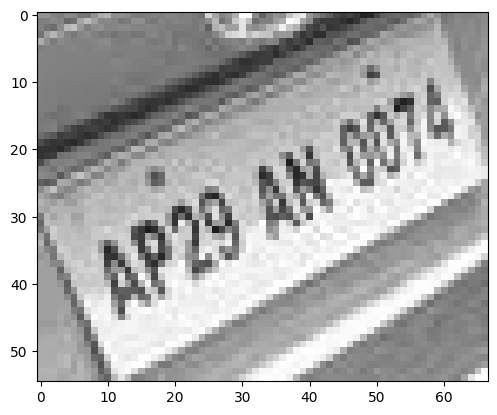

In [275]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


In [276]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 22], [34, 22], [34, 48], [6, 48]], 'ap29', 0.1473846584558487),
 ([[24.084347429557695, 22.425304228867308],
   [62.313561489608404, 4.491836808227388],
   [69.9156525704423, 20.574695771132692],
   [32.686438510391596, 38.50816319177261]],
  'AN CO74',
  0.04032282372983261)]

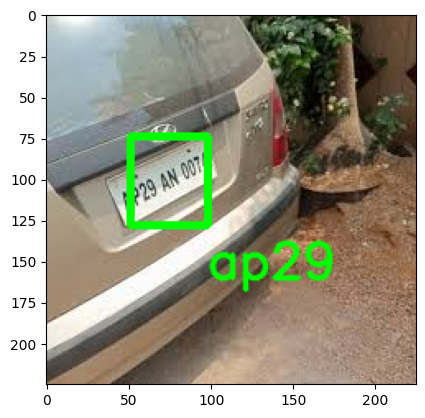

In [277]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
